In [1]:
'''
__author__ = "Deepraj chawda"
__version__ = "Python 3.8.5"
'''
import requests
import bs4
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://money.cnn.com/data/us_markets/'

In [3]:
response = requests.get(url)

In [4]:
soup = bs4.BeautifulSoup(response.content,'html')

In [5]:
div = soup.find('div',attrs={'id':'wsod_marketMoversContainer'})

In [15]:
stocks = {
    'Gainers_&_Losers' : [],
    'Price' : [],
    'Change' : [],
    '%_Change' : []
}

In [7]:
all_tr = div.find_all('td',attrs={'class':'wsod_firstCol'})

for name in all_tr:
    stocks['Gainers_&_Losers'].append(name.text)

all_td = div.find_all('td',attrs={'class':'wsod_aRight'})

for i in range(0,len(all_td),3):
    stocks['Price'].append(float(all_td[i].text))
    stocks['Change'].append(float(all_td[i+1].text))
    stocks['%_Change'].append(all_td[i+2].text)

In [8]:
stocks = pd.DataFrame(stocks)

In [9]:
stocks

,Gainers_&_Losers,Price,Change,%_Change
0,EFXEquifax Inc,163.55,9.03,+5.84%
1,FISFidelity National ...,156.16,8.20,+5.54%
2,IRMIron Mountain Inc,33.21,1.42,+4.47%
3,LHLaboratory Corpora...,194.94,7.43,+3.96%
4,AMATApplied Materials ...,67.68,2.30,+3.53%
5,NTAPNetApp Inc,54.81,-6.01,-9.88%
6,CTLCenturylink Inc,13.79,-1.37,-9.04%
7,KHCKraft Heinz Co,27.84,-2.20,-7.32%
8,HIIHuntington Ingalls...,250.62,-19.46,-7.21%
9,ZBRAZebra Technologies...,234.44,-17.55,-6.96%


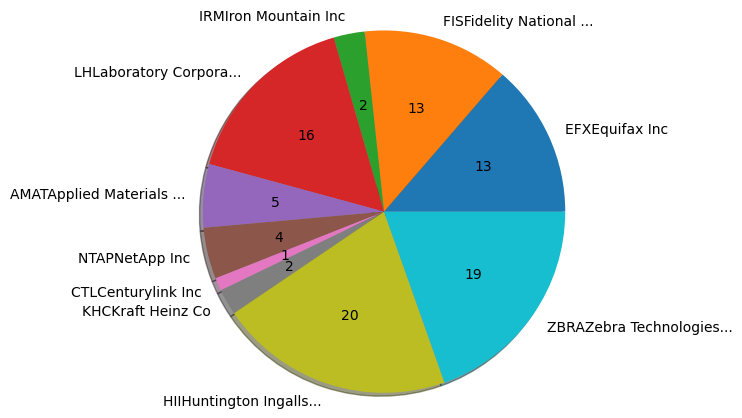

In [10]:
plt.figure(dpi=100)
plt.pie(stocks['Price'],labels=stocks['Gainers_&_Losers'],radius=1.5,shadow=True,autopct='%d')
plt.xticks(rotation=90)
plt.show()

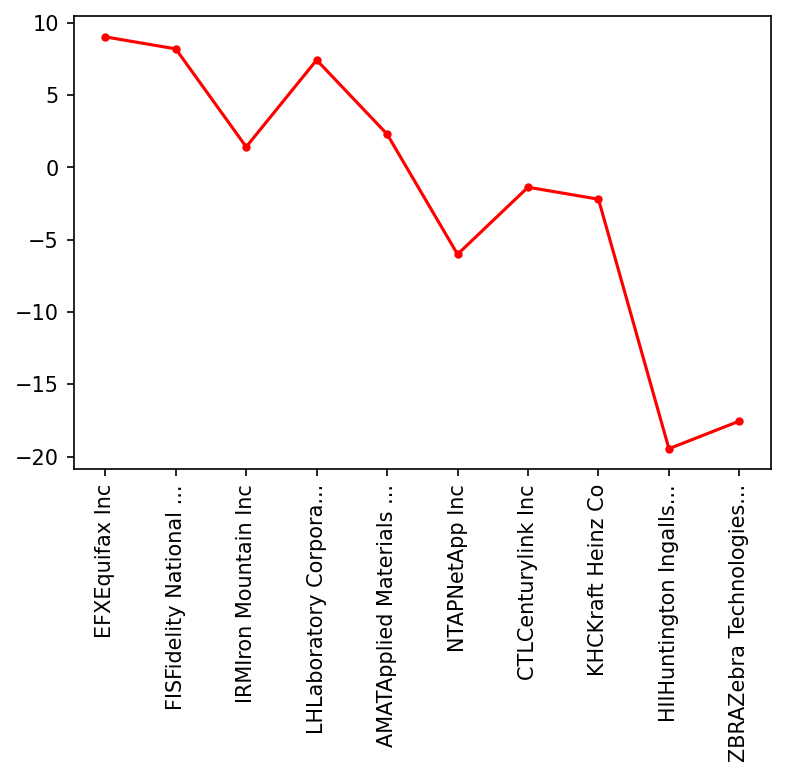

In [11]:
plt.figure(dpi=150)
plt.plot(stocks['Gainers_&_Losers'],stocks['Change'],'r.-')
plt.xticks(rotation=90)
plt.show()

In [12]:
changes = []
for price,change in zip(stocks['Price'],stocks['Change']):
    changes.append(float(price+change))

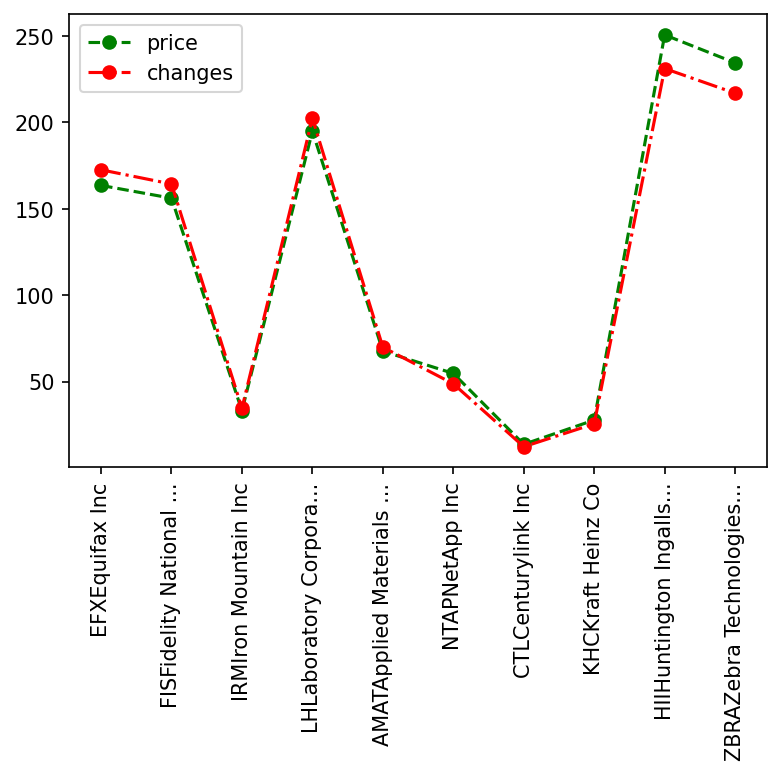

In [13]:
plt.figure(dpi=150)
plt.plot(stocks['Gainers_&_Losers'],stocks['Price'],'g--o',label='price')
plt.plot(stocks['Gainers_&_Losers'],changes,'r-.o',label='changes')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [16]:
stocks.to_csv('stocks.csv',index=False)